# Data Science HomeWork #1

In [196]:
from os.path import join 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [197]:
abalone = pd.read_csv(join('data','Abalone.csv'))
abalone.head(10)

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
7,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
8,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
9,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14


## data preprocessing

In [198]:
data=np.array(abalone)
nvar=data.shape[1]
datax=data[:,1:]
datay=data[:,0]

In [199]:
print(datax[0:8,:])

[[0.35 0.265 0.09 0.2255 0.0995 0.0485 0.07 7]
 [0.53 0.42 0.135 0.677 0.2565 0.1415 0.21 9]
 [0.44 0.365 0.125 0.516 0.2155 0.114 0.155 10]
 [0.33 0.255 0.08 0.205 0.0895 0.0395 0.055 7]
 [0.425 0.3 0.095 0.3515 0.141 0.0775 0.12 8]
 [0.53 0.415 0.15 0.7775 0.237 0.1415 0.33 20]
 [0.545 0.425 0.125 0.768 0.294 0.1495 0.26 16]
 [0.475 0.37 0.125 0.5095 0.2165 0.1125 0.165 9]]


In [200]:
datax_scale = datax
for i in range(nvar-1):
    datax_scale[:,i]=(datax[:,i]-np.mean(datax[:,i]))/np.std(datax[:,i])

In [201]:
print(datax_scale[0:8,:])
print(np.mean(datax_scale[:,0]),np.std(datax_scale[:,0]))

[[-1.4490072324859642 -1.439892290760389 -1.1842520945572457
  -1.2303442211573532 -1.170966946412532 -1.2053269560863338
  -1.2130540829433754 -0.9097968418572709]
 [0.049891504908479434 0.12201495468069294 -0.10824748385156577
  -0.3096011805619629 -0.46361041299853817 -0.35684354468012086
  -0.2072771917727622 -0.2892984568179171]
 [-0.6995578637887424 -0.4322101969274329 -0.34735961956393924
  -0.6379281562781487 -0.648334093699008 -0.6077391770851838
  -0.6024038275897888 0.020950735701759777]
 [-1.615551536640902 -1.5406605001436846 -1.4233642302696188
  -1.2721498298665572 -1.2160215026809393 -1.2874382539643545
  -1.3208158927116556 -0.9097968418572709]
 [-0.824466091904946 -1.0872035579188546 -1.064696026701059
  -0.9733926749446863 -0.983990537898642 -0.9407461073682675
  -0.8538480503824422 -0.5995476493375941]
 [0.049891504908479434 0.07163084998904509 0.25042071971699376
  -0.10465173298757383 -0.5514667977219324 -0.35684354468012086
  0.654817286373478 3.1234426608985286]

## k-Means Clustering

#### i) k = 3

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', random_state=122)
kmeans.fit(datax_scale)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=122,
       tol=0.0001, verbose=0)

In [57]:
kmeans.cluster_centers_

array([[-1.27881933, -1.27992169, -1.12269646, -1.13862952, -1.08509534,
        -1.11693309, -1.12956996, -0.85918695],
       [ 0.13236342,  0.12896449,  0.06713295, -0.08866474, -0.09386889,
        -0.08700213, -0.06348107,  0.14038528],
       [ 1.03334916,  1.0392924 ,  0.97776873,  1.21708527,  1.17334249,
         1.19393253,  1.17219663,  0.62026137]])

In [58]:
kmeans.labels_

array([0, 1, 1, ..., 2, 2, 2])

In [59]:
datay_num = datay
datay_num[np.where(datay == 'M')] = 0
datay_num[np.where(datay == 'F')] = 1
datay_num[np.where(datay =='I')] = 2

In [60]:
datay_num = np.array(datay_num, dtype=int)

In [61]:
y_compare = np.array([datay_num, kmeans.labels_])

In [62]:
y_compare

array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 2, 2, 2]])

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(datax_scale, kmeans.labels_)

0.3849954346035642

Text(0, 0.5, 'feature 2')

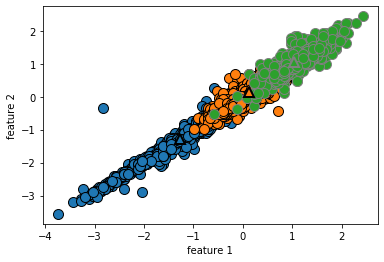

In [64]:
import mglearn
mglearn.discrete_scatter(datax[:, 0], datax[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

### ii) k=5

In [179]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='random', random_state=122)
kmeans.fit(datax_scale)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=5,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=122,
       tol=0.0001, verbose=0)

In [180]:
kmeans.cluster_centers_

array([[-0.2874268 , -0.29213439, -0.3041866 , -0.51862356, -0.49843294,
        -0.50562502, -0.49002936, -0.20484173],
       [ 0.40634504,  0.45205764,  0.56457337,  0.35604521,  0.08235854,
         0.28210319,  0.59497509,  1.94763123],
       [ 1.31409259,  1.31523699,  1.29460432,  1.75446885,  1.70427607,
         1.7090951 ,  1.68395623,  0.69630307],
       [ 0.64213294,  0.63304186,  0.47090458,  0.51627415,  0.56433733,
         0.52683633,  0.43889981, -0.01153207],
       [-1.57396744, -1.57500472, -1.34977978, -1.28526651, -1.22837916,
        -1.25720321, -1.27892646, -1.03180495]])

In [181]:
kmeans.labels_

array([4, 0, 0, ..., 3, 3, 2])

In [182]:
datay_num = datay
datay_num[np.where(datay == 'M')] = 0
datay_num[np.where(datay == 'F')] = 1
datay_num[np.where(datay =='I')] = 2

In [183]:
datay_num = np.array(datay_num, dtype=int)

In [184]:
y_compare = np.array([datay_num, kmeans.labels_])

In [185]:
y_compare

array([[0, 1, 0, ..., 0, 1, 0],
       [4, 0, 0, ..., 3, 3, 2]])

In [186]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(datax_scale, kmeans.labels_)

0.35830676176985576

Text(0, 0.5, 'feature 2')

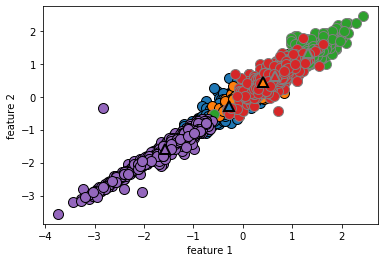

In [191]:
import mglearn
mglearn.discrete_scatter(datax[:, 0], datax[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2, 3, 4],
    markers='^', markeredgewidth=2)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

### iii) k=7

In [130]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, init='random', random_state=122)
kmeans.fit(datax_scale)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=122,
       tol=0.0001, verbose=0)

In [131]:
kmeans.cluster_centers_

array([[ 0.35088266,  0.34952256,  0.20919921,  0.12479265,  0.14882964,
         0.12509135,  0.11743189, -0.03981972],
       [-0.28987459, -0.29359449, -0.29152919, -0.53006541, -0.5217377 ,
        -0.50938206, -0.49643381, -0.08770965],
       [ 1.42254284,  1.41992128,  1.45157466,  2.00777476,  1.96003489,
         1.95148964,  1.91231148,  0.79657372],
       [ 0.50481454,  0.55535207,  0.69333984,  0.49508664,  0.18204557,
         0.3898886 ,  0.77019716,  2.20935276],
       [-2.11121911, -2.10148357, -1.75534581, -1.47296302, -1.40722178,
        -1.43291156, -1.47792577, -1.37332391],
       [-1.04123314, -1.05304104, -0.94620426, -1.06574504, -1.01095977,
        -1.05153409, -1.05425197, -0.72383145],
       [ 0.88659561,  0.88021749,  0.73176385,  0.89389369,  0.92190954,
         0.90602142,  0.79761172,  0.15853951]])

In [132]:
kmeans.labels_

array([5, 1, 1, ..., 6, 6, 2])

In [133]:
datay_num = datay
datay_num[np.where(datay == 'M')] = 0
datay_num[np.where(datay == 'F')] = 1
datay_num[np.where(datay =='I')] = 2

In [134]:
datay_num = np.array(datay_num, dtype=int)

In [135]:
y_compare = np.array([datay_num, kmeans.labels_])

In [136]:
y_compare

array([[0, 1, 0, ..., 0, 1, 0],
       [5, 1, 1, ..., 6, 6, 2]])

In [138]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(datax_scale, kmeans.labels_)


0.2957880006777551

Text(0, 0.5, 'feature 2')

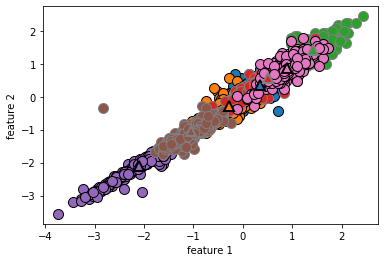

In [82]:
import mglearn
mglearn.discrete_scatter(datax[:, 0], datax[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0, 1, 2, 3, 4, 5, 6],
    markers='^', markeredgewidth=2)
plt.xlabel("feature 1")
plt.ylabel("feature 2")

## DBSCAN

In [83]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import mglearn

[ 0  0  0 ... -1  0 -1]
{0: 3370, -1: 780, 1: 7, 2: 6, 3: 4, 5: 5, 4: 4}


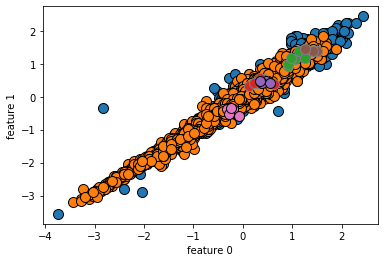

In [194]:
dbscan = DBSCAN( min_samples=5, metric='euclidean')

clusters=dbscan.fit_predict(datax)
#plt.scatter(datax[:, 0], datax[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')

mglearn.discrete_scatter(datax[:, 0], datax[:, 1], clusters, markers='o')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

print(clusters)

w_count={}
for idx in clusters:
    try: w_count[idx]+= 1
    except: w_count[idx]=1
print(w_count)

In [85]:
print("cluster label: {}".format(clusters))

cluster label: [ 0  0  0 ... -1  0 -1]


[ 0  0  0 ... -1  0 -1]
{0: 3370, -1: 780, 1: 7, 2: 6, 3: 4, 5: 5, 4: 4}


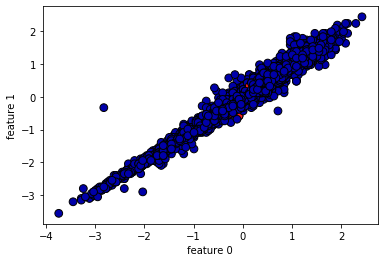

In [86]:
from sklearn.preprocessing import StandardScaler

X=datax
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
 # 클러스터 할당을 표시합니다
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

print(clusters)

w_count={}
for idx in clusters:
    try: w_count[idx]+= 1
    except: w_count[idx]=1
print(w_count)


In [195]:
silhouette_score(datax_scale, clusters.labels_)

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

## Hierarchical Clustring

In [212]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_samples, silhouette_score

In [224]:
complete_clustering = AgglomerativeClustering(linkage='complete', n_clusters=3).fit(datax)

In [ ]:
complete_clustering = AgglomerativeClustering(linkage='complete', n_clusters=5).fit(datax)

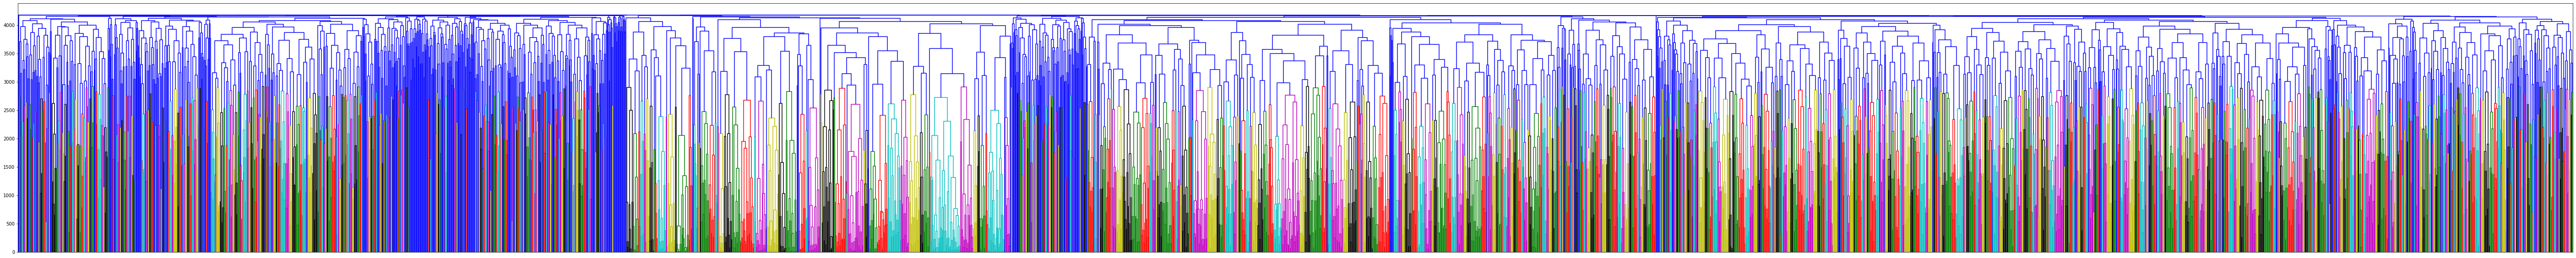

In [225]:
plt.figure(figsize=(100,10))

children=complete_clustering.children_

distance = np.arange(children.shape[0])

no_of_observations = np.arange(2,children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p = datax_scale.shape[0], labels = complete_clustering.labels_, show_contracted=True, no_labels = True, )

plt.show()

In [226]:
silhouette_score(datax_scale, complete_clustering.labels_)

0.3757197340862745

In [243]:
single_clustering = AgglomerativeClustering(linkage='single', n_clusters=7).fit(datax)

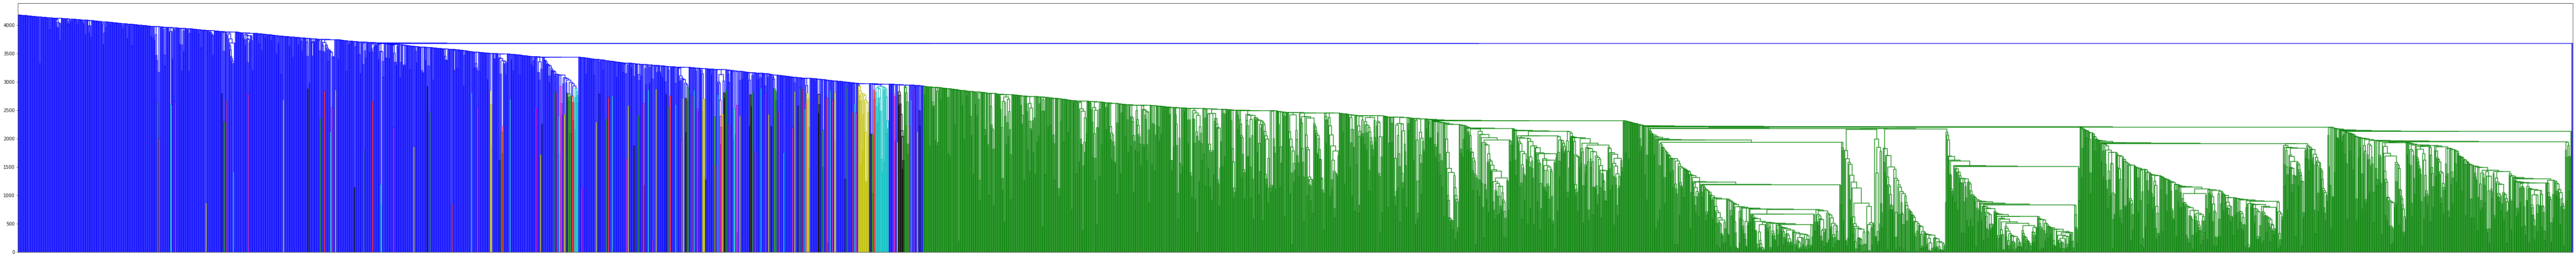

In [244]:
plt.figure(figsize=(100,10))

children=single_clustering.children_

distance = np.arange(children.shape[0])

no_of_observations = np.arange(2,children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p = datax_scale.shape[0], labels = single_clustering.labels_, show_contracted=True, no_labels = True, )

plt.show()

In [245]:
silhouette_score(datax_scale, single_clustering.labels_)

0.25424975055082993

In [255]:
average_clustering = AgglomerativeClustering(linkage='average', n_clusters=4100).fit(datax)

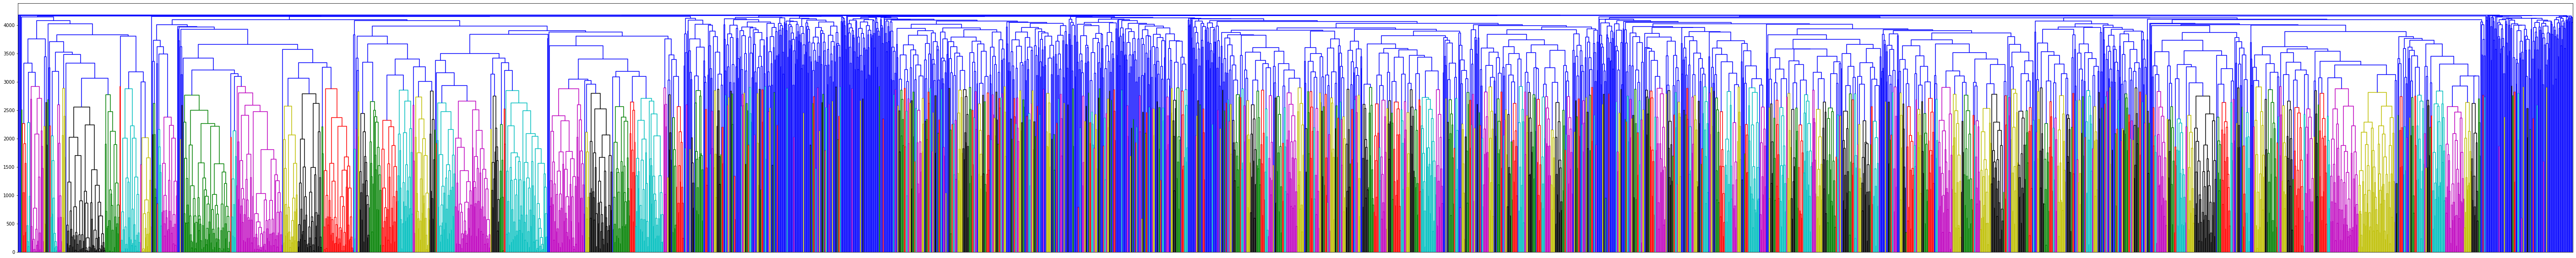

In [256]:
plt.figure(figsize=(100,10))

children=average_clustering.children_

distance = np.arange(children.shape[0])

no_of_observations = np.arange(2,children.shape[0]+2)

linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

dendrogram(linkage_matrix, p = datax_scale.shape[0], labels = average_clustering.labels_, show_contracted=True, no_labels = True, )

plt.show()

In [257]:
silhouette_score(datax_scale, average_clustering.labels_)

0.014130613418013842